In [ ]:
# This is implimentation code for Principal Component Analysis
# Data is taken from kaggle
# final Data is cleaned, merged and grouped of all data sets which is taken from kaggle  

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

In [2]:
df = pd.read_csv("home_credit_final.csv")

In [3]:
df.head()

,SK_ID_CURR,train_CNT_CHILDREN_count,train_CNT_CHILDREN_mean,train_CNT_CHILDREN_max,train_CNT_CHILDREN_min,train_CNT_CHILDREN_sum,train_AMT_INCOME_TOTAL_count,train_AMT_INCOME_TOTAL_mean,train_AMT_INCOME_TOTAL_max,train_AMT_INCOME_TOTAL_min,...,payment_AMT_INSTALMENT_count,payment_AMT_INSTALMENT_mean,payment_AMT_INSTALMENT_max,payment_AMT_INSTALMENT_min,payment_AMT_INSTALMENT_sum,payment_AMT_PAYMENT_count,payment_AMT_PAYMENT_mean,payment_AMT_PAYMENT_max,payment_AMT_PAYMENT_min,payment_AMT_PAYMENT_sum
0,100002,1,0,0,0,0,1,202500.0,202500.0,202500.0,...,19.0,11559.247105,53093.745,9251.775,219625.695,19.0,11559.247105,53093.745,9251.775,219625.695
1,100003,1,0,0,0,0,1,270000.0,270000.0,270000.0,...,25.0,64754.586000,560835.360,6662.970,1618864.650,25.0,64754.586000,560835.360,6662.970,1618864.650
2,100004,1,0,0,0,0,1,67500.0,67500.0,67500.0,...,3.0,7096.155000,10573.965,5357.250,21288.465,3.0,7096.155000,10573.965,5357.250,21288.465
3,100006,1,0,0,0,0,1,135000.0,135000.0,135000.0,...,16.0,62947.088438,691786.890,2482.920,1007153.415,16.0,62947.088438,691786.890,2482.920,1007153.415
4,100007,1,0,0,0,0,1,121500.0,121500.0,121500.0,...,66.0,12666.444545,22678.785,1821.780,835985.340,66.0,12214.060227,22678.785,0.180,806127.975


In [5]:
df.shape

(307511, 1256)

In [17]:
# check null values

df1 = ~ df.isnull().sum()

In [19]:
df1.shape

(1256,)

In [22]:
# drop null values

df.dropna(inplace= True)

In [23]:
df.isnull().sum()

SK_ID_CURR                   0
train_CNT_CHILDREN_count     0
train_CNT_CHILDREN_mean      0
train_CNT_CHILDREN_max       0
train_CNT_CHILDREN_min       0
                            ..
payment_AMT_PAYMENT_count    0
payment_AMT_PAYMENT_mean     0
payment_AMT_PAYMENT_max      0
payment_AMT_PAYMENT_min      0
payment_AMT_PAYMENT_sum      0
Length: 1256, dtype: int64

In [24]:
df.shape

(28931, 1256)

In [25]:
# convert into numpy values
X = df.values

In [26]:
X

array([[1.00043000e+05, 1.00000000e+00, 2.00000000e+00, ...,
        3.16290690e+05, 1.12500000e+00, 1.25112807e+06],
       [1.00048000e+05, 1.00000000e+00, 0.00000000e+00, ...,
        5.48005995e+05, 7.74450000e+01, 1.89873725e+06],
       [1.00050000e+05, 1.00000000e+00, 0.00000000e+00, ...,
        6.07250700e+04, 6.91960500e+03, 1.64519145e+05],
       ...,
       [4.56242000e+05, 1.00000000e+00, 0.00000000e+00, ...,
        2.70000000e+04, 5.40000000e+01, 5.93616195e+05],
       [4.56244000e+05, 1.00000000e+00, 0.00000000e+00, ...,
        8.89827255e+05, 3.37500000e+00, 5.38234758e+06],
       [4.56247000e+05, 1.00000000e+00, 0.00000000e+00, ...,
        9.09900000e+04, 4.38300000e+01, 7.61822325e+05]])

In [27]:
# Scaling values

X = scale(X)

In [28]:
# fit PCA without principal component

pca = PCA()

In [29]:
# fit data 

pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [30]:
# 

var = pca.explained_variance_ratio_

In [31]:
# cumculative sum 
var1 = np.cumsum(np.round(pca.explained_variance_ratio_,decimals = 4) * 100)

In [32]:
print(var1)

[ 5.53  9.32 12.76 ... 99.82 99.82 99.82]


Text(0, 0.5, 'Cumulative Proportion variance explained')

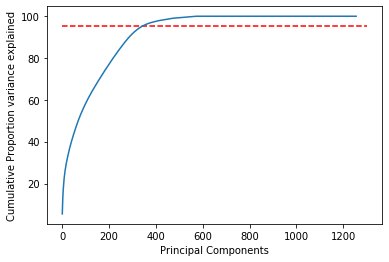

In [42]:
# plot 
plt.plot(var1)
plt.hlines(95,0,1300,colors='red',linestyles='dashed')
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Proportion variance explained")


In [47]:
# to find principal component which is taken greather than 95 %

Num_components = var1<95
print("Number of principal Components")
print(Num_components.sum())

Number of principal Components
341


In [49]:
# Now PCA is initialized with n_components 341
pca = PCA(n_components=341)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=341, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [50]:
X1 = pca.fit_transform(X)

In [51]:
print(X1)

[[ 1.16005775e+00  2.52959513e+00 -6.41392427e+00 ... -5.81621458e-01
   2.01313688e+00  1.65929542e-01]
 [-7.85964146e+00  1.00945465e+00 -6.14710050e+00 ...  1.33427661e+00
   1.02019052e+00 -1.41112652e+00]
 [-8.79525440e+00 -3.12520839e-01  3.73609789e+00 ... -1.17494306e-01
   5.32808186e-04  4.24386591e-01]
 ...
 [-1.17398264e+01 -1.33053943e+00 -1.06758778e+00 ...  1.64998431e-01
  -4.42814062e-01  3.94816214e-01]
 [ 2.95139954e+01  9.46341189e+00  7.73313460e+00 ...  1.30632689e+00
   1.37549696e+00 -4.03652392e-01]
 [ 7.67104269e+00 -1.06092248e+01  6.04558261e+00 ... -1.08888801e+00
  -9.32709316e-02  7.02290719e-01]]


In [53]:
X1.shape

(28931, 341)